<a href="https://colab.research.google.com/github/sakibtheseeker/Machine_Learning/blob/main/ML_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Dataset**

In [ ]:
# importing pandas package
import pandas as pd
   
# making data frame from csv file
data = pd.read_csv("/content/drive/MyDrive/TY IT/SEM 6/ML/CA2/Datasets/insurance.csv")
df=data[1:101]
df


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850
99,38,male,19.300,0,yes,southwest,15820.69900


# **Data Cleaning**

In [ ]:
df = df.dropna(axis = 0, how ='any')
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# **Label Encoding**

In [ ]:
import pandas as pd  
from sklearn import preprocessing   

   

newdata = pd.DataFrame(df)  

  
my_label = preprocessing.LabelEncoder()   
   
newdata[ 'sex' ]= my_label.fit_transform(newdata[ 'sex' ])   
newdata[ 'smoker' ]= my_label.fit_transform(newdata[ 'smoker' ]) 
newdata[ 'region' ]= my_label.fit_transform(newdata[ 'region' ]) 

print(newdata[ 'sex' ].unique()) 
print(newdata[ 'smoker' ].unique())
print(newdata[ 'region' ].unique()) 
#print("Data Frame after Label Encoding:\n")  
print( newdata )  

[1 0]
[0 1]
[2 1 0 3]
     age  sex     bmi  children  smoker  region      charges
1     18    1  33.770         1       0       2   1725.55230
2     28    1  33.000         3       0       2   4449.46200
3     33    1  22.705         0       0       1  21984.47061
4     32    1  28.880         0       0       1   3866.85520
5     31    0  25.740         0       0       2   3756.62160
..   ...  ...     ...       ...     ...     ...          ...
96    54    0  30.800         3       0       3  12105.32000
97    55    1  38.280         0       0       2  10226.28420
98    56    1  19.950         0       1       0  22412.64850
99    38    1  19.300         0       1       3  15820.69900
100   41    0  31.600         0       0       3   6186.12700

[100 rows x 7 columns]


# **Linear Regression**

[11058.01372624]


ValueError: ignored

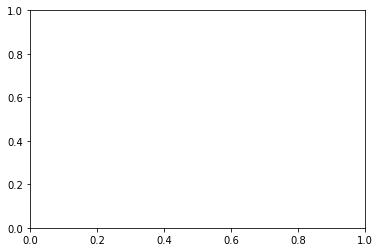

In [ ]:
import numpy as np
import matplotlib.pyplot as mtp
x=newdata.iloc[:,0:2].values
y=newdata.iloc[:,-1].values
 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)


from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred1=regressor.predict([[18,1]])

print(y_pred1)

mtp.scatter(x_train,y_train,color='green')
mtp.plot(x_train,regressor.predict(x_train))
mtp.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Polynomial Regression**

# **SVM**

In [ ]:
#Data Pre-processing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  

  
#Extracting Independent and dependent Variable  
x= newdata.iloc[:, 0:2].values  
y= newdata.iloc[:, 6].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)     

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

ValueError: ignored

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  


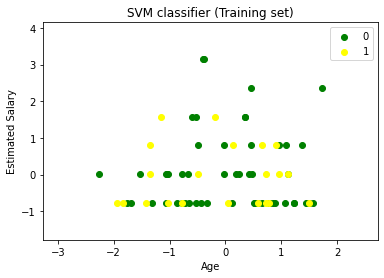

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('white', 'black')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('green', 'yellow'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

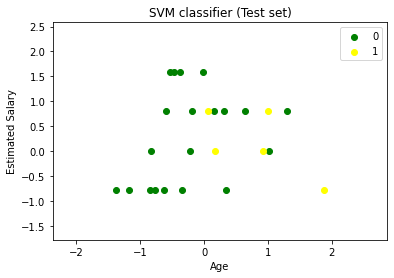

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('white','black' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('green', 'yellow'))(i), label = j)  
mtp.title('SVM classifier (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  